In [2]:
import pandas as pd
import numpy as np


# statement 1

In [3]:
data=pd.read_csv("C:/Users/Admin/Desktop/ds/delivery_time.csv")

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

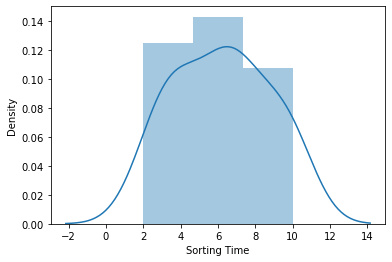

In [9]:
sns.distplot(data['Sorting Time'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

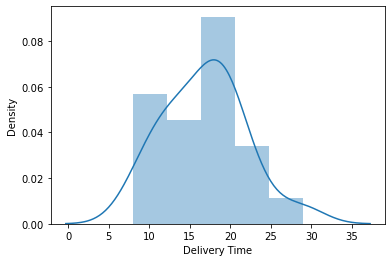

In [10]:
sns.distplot(data['Delivery Time'])

In [11]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
import statsmodels.formula.api as smf


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

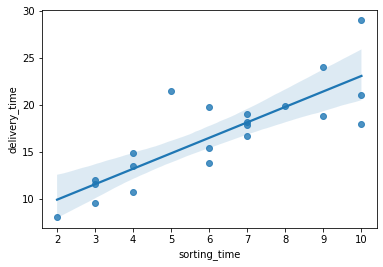

In [13]:
sns.regplot(x='sorting_time',y='delivery_time',data=data)

In [14]:
model = smf.ols("delivery_time ~ sorting_time",data = data).fit()

In [15]:
model

In [16]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [19]:
y=(6.582734) + (1.649020)*5

In [20]:
y

14.827834

In [21]:
newtime=pd.Series([5,8])

In [22]:
pred=pd.DataFrame(newtime,columns=['sorting_time'])

pred

,sorting_time
0,5
1,8


In [23]:
model.predict(pred)

0    14.827833
1    19.774893
dtype: float64

# improving model using logarithmic transformation

In [24]:
x_log=np.log(data['sorting_time'])
y_log=np.log(data['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

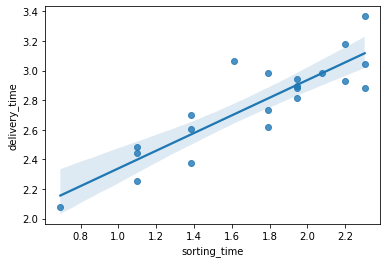

In [25]:
sns.regplot(x=x_log,y=y_log,data=data)

In [26]:
model = smf.ols("y_log ~ x_log",data = data).fit()

In [27]:
model

In [28]:
model.params

Intercept    1.741987
x_log        0.597522
dtype: float64

In [29]:
print(model.pvalues,'\n',model.tvalues)

Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64 
 Intercept    13.085552
x_log         8.024484
dtype: float64


In [30]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [31]:
y_log=(1.741987) + (0.597522)*5

In [32]:
y_log

4.729597

In [33]:
newtime=pd.Series([5,8])

In [34]:
pred=pd.DataFrame(newtime,columns=['x_log'])

pred

,x_log
0,5
1,8


In [35]:
model.predict(pred)

0    4.729599
1    6.522166
dtype: float64

In [37]:
data

,delivery_time,sorting_time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


# improving model using squareroot transformation

In [61]:
data1=data.drop(data.columns[2],axis=1)
data1

,delivery_time,sorting_time,a_Sqrt
0,4.582576,3.162278,2.140695
1,3.674235,2.000000,1.916829
2,4.444097,2.449490,2.108103
3,4.898979,3.000000,2.213364
4,5.385165,3.162278,2.320596
5,3.917908,2.449490,1.979371
6,4.358899,2.645751,2.087798
7,3.082207,1.732051,1.755622
8,4.230839,3.162278,2.056900
9,4.330127,3.000000,2.080896


In [65]:
data2=data1.drop(data1.columns[2],axis=1)
data2

,delivery_time,sorting_time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


In [68]:
data2.insert(len(data2.columns), 'a_Sqrt',
         np.sqrt(data2.iloc[:,0]))
data2

,delivery_time,sorting_time,a_Sqrt
0,4.582576,3.162278,2.140695
1,3.674235,2.000000,1.916829
2,4.444097,2.449490,2.108103
3,4.898979,3.000000,2.213364
4,5.385165,3.162278,2.320596
5,3.917908,2.449490,1.979371
6,4.358899,2.645751,2.087798
7,3.082207,1.732051,1.755622
8,4.230839,3.162278,2.056900
9,4.330127,3.000000,2.080896


In [71]:
model = smf.ols("delivery_time ~a_Sqrt",data = data2).fit()

In [72]:
model

In [73]:
model.params

Intercept   -3.930699
a_Sqrt       3.977225
dtype: float64

In [74]:
print(model.pvalues,'\n',model.tvalues)

Intercept    1.208065e-20
a_Sqrt       1.741538e-26
dtype: float64 
 Intercept   -44.318370
a_Sqrt       90.265625
dtype: float64


In [75]:
(model.rsquared,model.rsquared_adj)

(0.9976735310433699, 0.9975510853088104)

In [80]:
y_quad=( -3.930699) + (3.977225)*5

In [81]:
y_quad

15.955426

In [82]:
newtime=pd.Series([5,8])

In [83]:
pred=pd.DataFrame(newtime,columns=['a_Sqrt'])

pred

,a_Sqrt
0,5
1,8


# improving model with square transformation

In [87]:
data2['Squar_del_time'] = data2.apply(lambda row: row.delivery_time**2, axis =1 )
data2

,delivery_time,sorting_time,a_Sqrt,Squar_del_time
0,4.582576,3.162278,2.140695,21.00
1,3.674235,2.000000,1.916829,13.50
2,4.444097,2.449490,2.108103,19.75
3,4.898979,3.000000,2.213364,24.00
4,5.385165,3.162278,2.320596,29.00
5,3.917908,2.449490,1.979371,15.35
6,4.358899,2.645751,2.087798,19.00
7,3.082207,1.732051,1.755622,9.50
8,4.230839,3.162278,2.056900,17.90
9,4.330127,3.000000,2.080896,18.75


In [161]:
model=smf.ols('Squar_del_time~sorting_time',data=data2).fit()

In [162]:
model

In [163]:
model.params

Intercept      -2.518837
sorting_time    7.936591
dtype: float64

In [164]:
print(model.pvalues,'\n',model.tvalues)

Intercept       0.410857
sorting_time    0.000003
dtype: float64 
 Intercept      -0.840911
sorting_time    6.592434
dtype: float64


In [165]:
(model.rsquared,model.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

# improving model with reciprocol transformation

In [144]:
reciprocal_del_time = 1/data2["delivery_time"]

In [145]:
reciprocal_del_time

0     0.218218
1     0.272166
2     0.225018
3     0.204124
4     0.185695
5     0.255238
6     0.229416
7     0.324443
8     0.236360
9     0.230940
10    0.224563
11    0.304997
12    0.244851
13    0.294884
14    0.288315
15    0.259238
16    0.269680
17    0.234985
18    0.353553
19    0.236823
20    0.215666
Name: delivery_time, dtype: float64

In [146]:
model=smf.ols('reciprocal_del_time~sorting_time',data=data2).fit()

In [147]:
model

In [148]:
model.params

Intercept       0.417452
sorting_time   -0.067667
dtype: float64

In [149]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.010687e-13
sorting_time    3.782426e-07
dtype: float64 
 Intercept       18.765602
sorting_time    -7.568248
dtype: float64


In [150]:
(model.rsquared,model.rsquared_adj)

(0.7509123829021922, 0.737802508318097)

# improving model using Box-cox transformation

In [151]:
from scipy.stats import boxcox
bcx_target, lam = boxcox(data2["delivery_time"])

In [152]:
model=smf.ols('bcx_target~sorting_time',data=data2).fit()

model.params

In [153]:
model.params

Intercept       0.544638
sorting_time    1.135525
dtype: float64

In [154]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.865590e-01
sorting_time    9.250926e-07
dtype: float64 
 Intercept       1.370329
sorting_time    7.108464
dtype: float64


In [155]:
(model.rsquared,model.rsquared_adj)

(0.7267376785595664, 0.712355451115333)

# improving model using  Yeo-Johnson Transformation

In [156]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(data2["delivery_time"])

In [157]:
model=smf.ols('yf_target~sorting_time',data=data2).fit()

In [158]:
model.params

Intercept       1.638954
sorting_time    1.234534
dtype: float64

In [159]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.239628e-03
sorting_time    9.376352e-07
dtype: float64 
 Intercept       3.789318
sorting_time    7.101651
dtype: float64


In [160]:
(model.rsquared,model.rsquared_adj)

(0.7263566622046955, 0.7119543812681006)

# the reciprocol transformation is best transformation for this model

# statement 2

In [94]:
salary=pd.read_csv("C:/Users/Admin/Desktop/ds/Salary_data.csv")

In [95]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [96]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

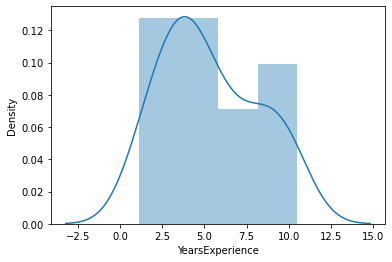

In [97]:
sns.distplot(salary['YearsExperience'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

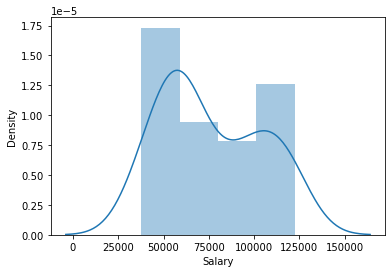

In [98]:
sns.distplot(salary['Salary'])

In [99]:
salary=salary.rename({'YearsExperience':'year', 'Salary':'income'},axis=1)


In [100]:
salary

,year,income
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='year', ylabel='income'>

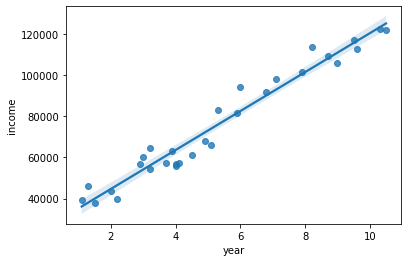

In [101]:
sns.regplot(x='year',y='income',data=salary)

In [102]:
model = smf.ols("income ~ year",data = salary).fit()

model

In [103]:
model

In [104]:
model.params

Intercept    25792.200199
year          9449.962321
dtype: float64

In [105]:
print(model.tvalues, '\n', model.pvalues)    

Intercept    11.346940
year         24.950094
dtype: float64 
 Intercept    5.511950e-12
year         1.143068e-20
dtype: float64


In [106]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [107]:
newsalary=pd.Series([200,300])

In [108]:
data_pred=pd.DataFrame(newsalary,columns=['year'])

In [109]:
data_pred

,year
0,200
1,300


In [110]:
model.predict(data_pred)

0    1.915785e+06
1    2.860781e+06
dtype: float64

# improving model using logarithm

In [111]:
salary1=np.log(salary)

In [112]:
salary1

,year,income
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


<AxesSubplot:xlabel='year', ylabel='income'>

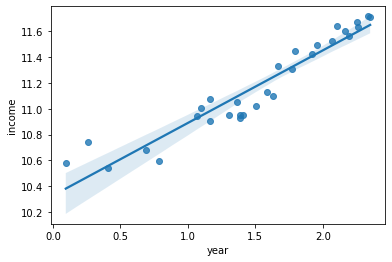

In [113]:
sns.regplot(x='year',y='income',data=salary1)

In [114]:
model = smf.ols("income ~ year",data = salary1).fit()

In [115]:
model

In [116]:
print(model.pvalues,'\n',model.tvalues)

Intercept    9.073132e-45
year         7.395278e-16
dtype: float64 
 Intercept    184.867959
year          16.352542
dtype: float64


In [117]:
(model.rsquared)

0.9052150725817149

# improving model using squarroot transformation

In [118]:
salary.insert(len(salary.columns), 'A_Sqrt',
         np.sqrt(salary.iloc[:,0]))
salary

,year,income,A_Sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240
5,2.9,56642.0,1.702939
6,3.0,60150.0,1.732051
7,3.2,54445.0,1.788854
8,3.2,64445.0,1.788854
9,3.7,57189.0,1.923538


In [119]:
model=smf.ols('income~A_Sqrt',data=salary).fit()

In [120]:
model

In [122]:
model.params

Intercept   -16055.769117
A_Sqrt       41500.680583
dtype: float64

In [123]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.262308
A_Sqrt       19.437148
dtype: float64 
 Intercept    2.906965e-03
A_Sqrt       8.565358e-18
dtype: float64


In [124]:
(model.rsquared,model.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

# improving model with square transformation

In [127]:
salary['Squar_income'] = salary.apply(lambda row: row.income**2, axis =1 )
salary

,year,income,A_Sqrt,Squar_del_time,Squar_income
0,1.1,39343.0,1.048809,1.547872e+09,1.547872e+09
1,1.3,46205.0,1.140175,2.134902e+09,2.134902e+09
2,1.5,37731.0,1.224745,1.423628e+09,1.423628e+09
3,2.0,43525.0,1.414214,1.894426e+09,1.894426e+09
4,2.2,39891.0,1.483240,1.591292e+09,1.591292e+09
5,2.9,56642.0,1.702939,3.208316e+09,3.208316e+09
6,3.0,60150.0,1.732051,3.618022e+09,3.618022e+09
7,3.2,54445.0,1.788854,2.964258e+09,2.964258e+09
8,3.2,64445.0,1.788854,4.153158e+09,4.153158e+09
9,3.7,57189.0,1.923538,3.270582e+09,3.270582e+09


In [131]:
salary=salary.drop(salary.columns[3],axis=1)
salary

,year,income,A_Sqrt,Squar_income
0,1.1,39343.0,1.048809,1.547872e+09
1,1.3,46205.0,1.140175,2.134902e+09
2,1.5,37731.0,1.224745,1.423628e+09
3,2.0,43525.0,1.414214,1.894426e+09
4,2.2,39891.0,1.483240,1.591292e+09
5,2.9,56642.0,1.702939,3.208316e+09
6,3.0,60150.0,1.732051,3.618022e+09
7,3.2,54445.0,1.788854,2.964258e+09
8,3.2,64445.0,1.788854,4.153158e+09
9,3.7,57189.0,1.923538,3.270582e+09


In [132]:
model=smf.ols('Squar_income~year',data=salary).fit()

In [133]:
model

In [134]:
model.params

Intercept   -1.609636e+09
year         1.526836e+09
dtype: float64

In [135]:
print(model.pvalues,'\n',model.tvalues)

Intercept    5.114661e-04
year         2.152535e-19
dtype: float64 
 Intercept    -3.926574
year         22.352727
dtype: float64


In [136]:
(model.rsquared,model.rsquared_adj)

(0.946933959304622, 0.9450387435655013)

# #improving model using Box-cox transformation

In [169]:
from scipy.stats import boxcox
bcx_target, lam = boxcox(salary["income"])

In [170]:
model=smf.ols('bcx_target~year',data=salary).fit()

In [171]:
model

In [172]:
print(model.pvalues,'\n',model.tvalues)

Intercept    7.255691e-45
year         3.477707e-18
dtype: float64 
 Intercept    186.350884
year          20.117718
dtype: float64


In [173]:
(model.rsquared,model.rsquared_adj)

(0.9352934131758684, 0.9329824636464352)

# improving model using  Yeo-Johnson Transformation

In [174]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(salary["income"])

In [175]:
model=smf.ols('yf_target~year',data=salary).fit()

In [176]:
model.params

Intercept    15.751205
year          0.283321
dtype: float64

In [178]:
print(model.pvalues,'\n',model.tvalues)

Intercept    7.240897e-45
year         3.477604e-18
dtype: float64 
 Intercept    186.364479
year          20.117740
dtype: float64


In [179]:
(model.rsquared,model.rsquared_adj)

(0.9352935495683511, 0.9329826049100779)